### **PyTorch Computer Vision**

Libraries
- `torchvision` : Base domain for PyTorch Computer Vision

- `torchvision.datasets` : Get datasets and data loading function for computer vision

- `torchvision.models` : Get pretrained computer vision models

- `torchvision.transforms` : Function for manipulating your data to be suitable for computer vision models

- `torch.utils.data.Dataset` : Base dataset class for PyTorch

- `torch.utils.data.DataLoader` : Creates a Python iterable over a dataset

In [2]:
# Import Dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt

print(f'Torch Version: {torch.__version__}\nTorchVision Version: {torchvision.__version__}')

Torch Version: 2.4.1
TorchVision Version: 0.19.1


### **1. Getting a Dataset**

The dataset is Fashion MNIST - Grayscale images of clothing

Imagenet dataset

In [3]:
# Setup training data

train_data = datasets.FashionMNIST(
    root='Datasets', # Where to download
    train=True, # Train or Test data
    download=True,
    transform=torchvision.transforms.ToTensor(), # Converts to `data` tensor
    target_transform=None # To transform the `target` or `label`
)

test_data = datasets.FashionMNIST(root='Datasets',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

# ToTensor() converts Python Image Library (PIL) or numpy.ndarray to tensor
# H*W*C -> C*H*W, Range of [0.0, 1.0]

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names # 9 Labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# See first training example
image, label = train_data[0] # 9th Label
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx # Class to IDX mapping

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets, train_data.targets.shape # All Labels

(tensor([9, 0, 0,  ..., 3, 0, 5]), torch.Size([60000]))

In [9]:
# Check shape of image
image.shape # [Color Channel, Height, Weight]

# Color Channel - GreyScale 1 or 0

torch.Size([1, 28, 28])

In [10]:
class_name_0 = class_names[label]
class_name_0

'Ankle boot'

(-0.5, 27.5, 27.5, -0.5)

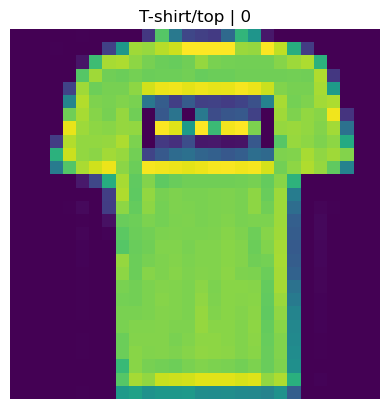

In [11]:
# Visualize random sample of data
image, label = train_data[1]

plt.imshow(image.squeeze()) 
# Remove an extra dimension since `matplotlib` doesn't support [1,28,28] shape

plt.title(f'{class_names[label]} | { label}')
plt.axis(False)

Text(0.5, 1.0, 'Dress | 3')

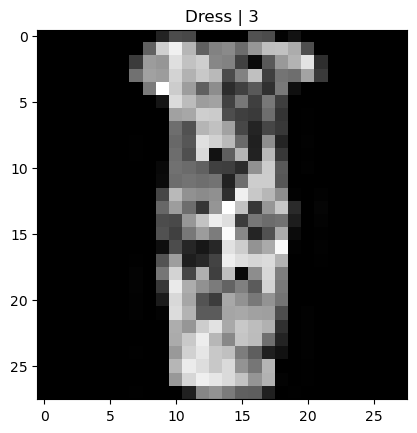

In [12]:
# In Greyscale
image, label = test_data[100]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'{class_names[label]} | {label}')

# Pixelated since the images are 28px by 28px

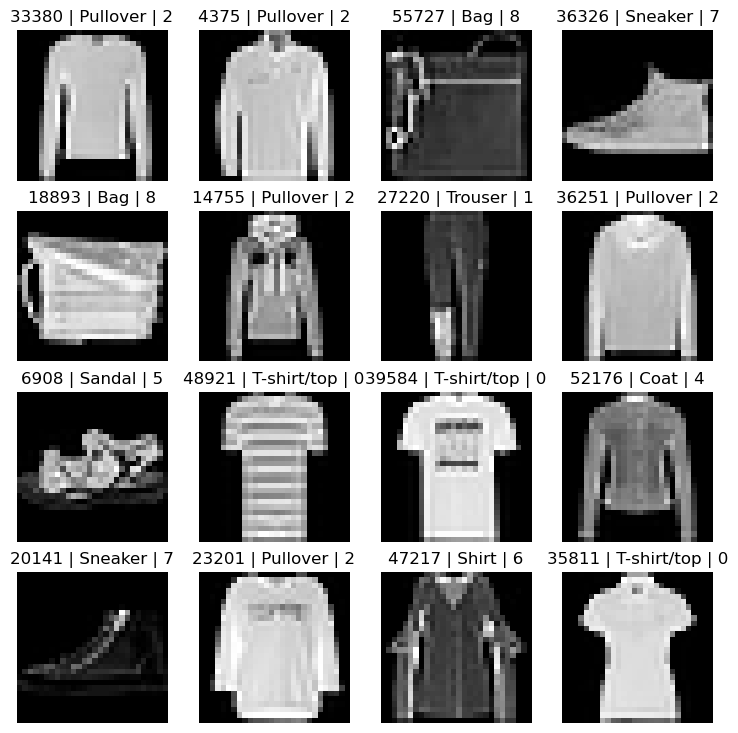

In [13]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # size[1] means generate 1D tensor with 1 value, Ex: tensor([185])
    # item() extracts 185 only

    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'{random_idx} | {class_names[label]} | {label}')
    plt.axis(False)

### **2. Prepare Dataloader**

Currently, data is in form of **PyTorch Datasets**

Dataloader turns our datasets into a **Python Iterable**

- Turn data into batches or mini-batches

    - It is more computationally efficient, break data into 32 images at a time instead of 60k images at once

    - Gives our neural network more chances to update its gradients per epoch

    - Check Mini Batch Gradient Descent

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size
BATCH_SIZE = 32

# Turn datasets into iterables (Batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)
# Shuffle is set to True so that the model doesn't learn order of images during training
# Shuffling isn't necessary during testing

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

train_dataloader, test_dataloader # Instances

(<torch.utils.data.dataloader.DataLoader at 0x2220d19ea50>,
 <torch.utils.data.dataloader.DataLoader at 0x2220e499df0>)

In [15]:
# Checking out
print(f'Dataloaders: {train_dataloader, test_dataloader}')
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

# Last batch might not have 32 images

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002220D19EA50>, <torch.utils.data.dataloader.DataLoader object at 0x000002220E499DF0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [16]:
# Accessing a single batch and label
train_iter = iter(train_dataloader) 
# Use this and next(train_iter) to get consecutive batches each run

train_features_batch1, train_labels_batch1 = next(iter(train_dataloader))
train_features_batch2, train_labels_batch2 = next(iter(train_dataloader))

print(len(train_features_batch1), len(train_features_batch2))
print(len(train_labels_batch1), len(train_labels_batch2))

train_features_batch1 == train_features_batch2

32 32
32 32


tensor([[[[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ..., False,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ..., False,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True]]],


        [[[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True]]],


        [[[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ..., False,  True,  True],
          ...,
          [ True,  True,  True,  ...,  True,  T

Image Shape: torch.Size([1, 28, 28])
Label: 6, Label Shape: torch.Size([])


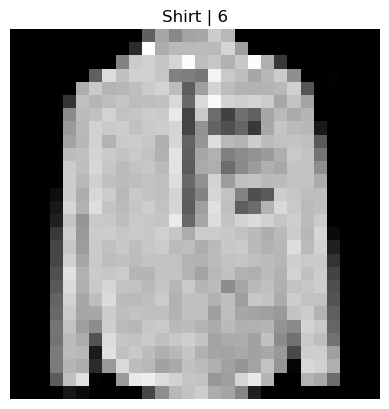

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch1), size=[1]).item()

image, label = train_features_batch1[random_idx], train_labels_batch1[random_idx]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'{class_names[label]} | {label}')
plt.axis('off')

print(f'Image Shape: {image.shape}')
print(f'Label: {label}, Label Shape: {label.shape}')

### 3. **ModelV0**: Build a baseline model

- Baseline Model is a simple model that is improved with subsequent models/experiments

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch1[15]

# Flatten Sample
xflat = flatten_model(x)

print(f'Shape of x before flattening: {x.shape}') # [color channel, ht, wt]
print(f'Shape of x after flattening: {xflat.shape}') # [color channel, ht*wt]

# 1 Value per pixel, Flattening done so linear transformations can be applied on batches

Shape of x before flattening: torch.Size([1, 28, 28])
Shape of x after flattening: torch.Size([1, 784])


In [19]:
xflat

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [20]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Compress image into a singular vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units, 
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [21]:
torch.manual_seed(42)
ModelV0 = FashionMNISTModelV0(input_shape=784, # Height*Width:28*28
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to('cpu')


dummy_x = torch.rand([1,1,28,28])
ModelV0.eval()
with torch.inference_mode():
    dummy_pred = ModelV0(dummy_x)
dummy_pred # 10 logits for 10 image classes, exactly the required output shape [1, 10]
# Hence, we can't have output shape like [1, 1, 28, 10]


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])

In [22]:
dummy_pred.shape

torch.Size([1, 10])

In [23]:
ModelV0.state_dict() # 2 layers of weight and bias

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [24]:
# Loss function and Optimizer - Cross Entropy and SGD, and evaluation metric is accuracy
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('Already exists!')
else:
    print('Downloading!')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py') as f:
        f.write(request.content)

Already exists!


In [25]:
from helper_functions import accuracy_fn

loss_fnV0 = nn.CrossEntropyLoss()

optimizerV0 = torch.optim.SGD(params=ModelV0.parameters(),
                              lr=0.1)

In [26]:
# Create a function to time experiments
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device} is {total_time:.4f} seconds')
    return total_time

In [27]:
I = []
start_time = timer()
for _ in range(10000000):
    I.append(1000)
end_time = timer()

print_train_time(start=start_time,
                 end=end_time)

Train time on None is 0.8526 seconds


0.8526136000000406

In [28]:
print('-'*50)

--------------------------------------------------


In [29]:
str(next(ModelV0.parameters()).device)

'cpu'

In [30]:
''' Create a training loop and training on batches of data
Gradients update once per batch rather than once per epoch
Training and test loss calculated per batch '''

from tqdm.auto import tqdm # Progress Bar

# Set manual seed and start the timer
torch.manual_seed(42)
train_time_oncpu_start = timer()

# Set the no. of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # Wrap epoch range with tqdm
    print(f'Epoch: {epoch}\n{'-'*50}')

    # Training Phase - Loop through the training batches
    train_loss = 0 # Initialize train loss to sum up later
    train_acc = 0

    for batch, (X, y) in enumerate(train_dataloader): # Batch enumerates batch number
        # Batch 1, 2, 3, ... and (X, y) -> (image, label)

        ModelV0.train()

        # 1. Forward Pass
        y_pred = ModelV0(X)

        # 2. Calculate loss per batch
        loss = loss_fnV0(y_pred, y)
        acc = accuracy_fn(y, y_pred.argmax(dim=1))
        train_loss += loss # Accumulate batch loss per epoch to average it out later
        train_acc += acc

        # 3. Optimizer zero grad
        optimizerV0.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer Step
        optimizerV0.step()

        # Print out what is happening
        if batch % 320 == 0:
            print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')

    # Divide the train loss by length of train dataloader
    train_loss /= len(train_dataloader) # Overall average train loss
    train_acc /= len(train_dataloader)

    # Testing Phase 
    test_loss, test_acc = 0, 0

    ModelV0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward Pass
            test_pred = ModelV0(X_test)

            # 2. Calculate loss accumulatively
            test_loss += loss_fnV0(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1)) # To get labels

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Caculate the test accuracy average per batch
        test_acc /= len(test_dataloader)

# Print out status
print(f'\nTrain Loss: {train_loss:.2f} | Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%')

train_time_oncpu_end = timer()
total_train_time_ModelV0 = print_train_time(start=train_time_oncpu_start,
                                            end=train_time_oncpu_end,
                                            device=str(next(ModelV0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples
Epoch: 1
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples
Epoch: 2
--------------------------------------------------
Looked at 0/60000 samples
Looked at 10240/60000 samples
Looked at 20480/60000 samples
Looked at 30720/60000 samples
Looked at 40960/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.46 | Train Accuracy: 84.05% | Test Loss: 0.48 | Test Accuracy: 83.43%
Train time on cpu is 19.9817 seconds


In [31]:
### Make predictions and get ModelV0 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
    '''
    Returns a dict containing the results of model predicting on data loader
    '''

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        # Get X, y -> Image, Label from DataLoader
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1)) # Choose label with highest prob

        # Scale loss and accuracy to find average loss, accuracy per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"Model Name": model.__class__.__name__, # When model is class instance
        "Model Loss": loss.item(), # Gets 1 item 
        "Model Accuracy": f'{acc:.2f}%'}

# Calculate ModelV0 results on test dataset
ModelV0_results = eval_model(model=ModelV0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fnV0,
                             accuracy_fn=accuracy_fn,
                             device = 'cpu')
ModelV0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': '83.43%'}

In [32]:
# Setup device agnostic code -> Shift to GPU
!nvidia-smi

Mon May 12 11:58:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   43C    P8              2W /  114W |    1126MiB /   8188MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [33]:
torch.cuda.is_available()

True

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [35]:
# Adding Non Linearity and running on GPU -> ModelV1
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [36]:
# Create instance 
torch.manual_seed(42)
ModelV1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(ModelV1.parameters()).device
# Is a generator object, so next(). Also, checks where model parameters are situated: CPU or GPU

device(type='cuda', index=0)

In [37]:
# Loss function and Optimizer
from helper_functions import accuracy_fn
loss_fnV1 = nn.CrossEntropyLoss()

optimizerV1 = torch.optim.SGD(params=ModelV1.parameters(),
                              lr=0.1)

In [38]:
# Training Loop - Functionizing

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = None):
    
    train_loss, train_acc = 0, 0

    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        acc = accuracy_fn(y, y_pred.argmax(dim=1))
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f'Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%')


In [39]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = None):
    
    test_loss, test_acc = 0, 0

    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            test_loss += loss_fn(y_pred, y)

            test_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        test_loss /= len(data_loader)      
        test_acc /= len(data_loader)      

    print(f'Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%')

In [40]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_ongpu_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n--------------------')

    train_step(model=ModelV1,
              data_loader=train_dataloader,
              loss_fn=loss_fnV1,
              optimizer=optimizerV1,
              accuracy_fn=accuracy_fn,
              device=device)
    
    test_step(model=ModelV1,
              data_loader=test_dataloader,
              loss_fn=loss_fnV1,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_ongpu_end = timer()

total_train_time_ModelV1 = print_train_time(start=train_time_ongpu_start, 
                                            end=train_time_ongpu_end, 
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Train Loss: 1.09199 | Train Accuracy: 61.34%
Test Loss: 0.95636 | Test Accuracy: 65.00%
Epoch: 1
--------------------
Train Loss: 0.78101 | Train Accuracy: 71.93%
Test Loss: 0.72227 | Test Accuracy: 73.91%
Epoch: 2
--------------------
Train Loss: 0.67027 | Train Accuracy: 75.94%
Test Loss: 0.68500 | Test Accuracy: 75.02%
Train time on cuda is 29.5693 seconds


In [41]:
ModelV0_results

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': '83.43%'}

In [42]:
total_train_time_ModelV0

19.98170179999579

In [43]:
ModelV1_results = eval_model(model=ModelV1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fnV1,
                             accuracy_fn=accuracy_fn,
                             device=device)
ModelV1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV1',
 'Model Loss': 0.6850008964538574,
 'Model Accuracy': '75.02%'}

In [44]:
total_train_time_ModelV1

29.569325799995568

### **Note**: Training on CPU faster than training on GPU

1. Overhead of copying data/model to and from the GPU outweighs the compute benefits offered by GPU

### **Convolutional Neural Networks (CNNs)**

In [45]:
# Model 2: CNN -> ConvNets: Finds patterns in visual data
# Simple CNN: 
# Inputs -> 
#   Processed Input (RGB Tensors) -> 
#       Conv Layer -> 
#           ReLU Layer -> 
#               Pooling Layer -> 
#                   Linear Output Layer (Labels)

# Residual Connections: Non-consecutive layers communicate with each other
# CNN Explainer Website

class FashionMNISTModelV2(nn.Module):
    '''
    Model architecture that replicates the TinyVGG model from CNN explainer website
    '''
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__() # Block -> Layers, Model -> Blocks
        self.conv_block_one = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, # 2D because we are working with images (ht*wd)
                      out_channels=hidden_units,
                      kernel_size=3, # Can also be set as a tuple (3,3)
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            # MaxPool takes maximum value from numbers presents in the filter/windows
        )

        self.conv_block_two = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # Output Layer also called Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(), # Tensor per Pixel Transformation
            nn.Linear(in_features=hidden_units*7*7, 
                      # We 7*7 to match with the dimensions set by flatten (490)
                      # Matrix Multiplication of 1*490 and 10*10 is occuring so to balance the calculation we add 7*7
                      out_features=output_shape)
        )

    def forward(self, x):
        # print(f'Before Conv: {x.shape}')
        x = self.conv_block_one(x)
        # print(f'After passing through first Conv: {x.shape}')
        x = self.conv_block_two(x)
        # print(f'After passing through second Conv: {x.shape}')
        x = self.classifier(x)
        # print(f'After Classifier: {x.shape}')

        return x

In [46]:
image.shape

torch.Size([1, 28, 28])

In [47]:
torch.manual_seed(42)
ModelV2 = FashionMNISTModelV2(input_shape=1, # 1 Color Channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [48]:
# Stepping through `nn.Conv2d()`
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single Image Shape: {test_image.shape}')
print(test_image)

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image Shape: torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.026

In [49]:
# Create a single conv2d() layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, # No. of color channels
                       out_channels=10,
                       kernel_size=5,
                       stride=1,
                       padding=0)

test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [50]:
test_image.shape, conv_layer(test_image.unsqueeze(0)) # Accepts 3 dim

(torch.Size([3, 64, 64]),
 tensor([[[[-5.9479e-01,  5.1592e-01, -1.5861e+00,  ..., -9.0964e-02,
             4.6227e-01, -6.0360e-01],
           [ 3.4598e-01, -1.7241e-01, -4.1079e-01,  ...,  1.6331e-01,
             5.2090e-01,  1.3144e+00],
           [-2.8077e-02, -4.4019e-01, -1.2165e+00,  ..., -2.4385e-01,
            -2.4841e-01,  3.5551e-01],
           ...,
           [ 6.3600e-01,  2.2507e-01,  2.0247e-01,  ...,  3.0973e-01,
             1.3567e-01,  7.5305e-02],
           [-8.4161e-01,  1.1192e-01,  1.7929e-01,  ...,  5.0107e-01,
            -6.6306e-01,  4.7155e-01],
           [ 1.0285e+00,  1.5175e+00,  5.5489e-01,  ..., -7.3607e-01,
            -7.1551e-01, -8.6667e-01]],
 
          [[ 1.3999e-01, -1.2239e+00, -1.0109e+00,  ...,  6.2065e-01,
            -7.5165e-01,  1.1006e+00],
           [-4.6926e-01,  4.6811e-01,  2.8089e-01,  ..., -2.5950e-01,
             1.1656e+00, -2.9479e-01],
           [ 1.5869e-01, -1.5092e-01,  1.5218e+00,  ...,  4.4120e-01,
             

In [51]:
conv_layer(test_image.unsqueeze(0)).shape
# All params: Kernel, Stride, Padding affect the shape of transformed inputs

torch.Size([1, 10, 60, 60])

In [52]:
## MaxPool2D()
max_pool = nn.MaxPool2d(kernel_size=3)

conved = conv_layer(test_image)
print(f'Shape of Conv Layer Inputs: {conved.shape}\nConv Ouput: {conved}')


Shape of Conv Layer Inputs: torch.Size([10, 60, 60])
Conv Ouput: tensor([[[-5.9479e-01,  5.1592e-01, -1.5861e+00,  ..., -9.0964e-02,
           4.6227e-01, -6.0360e-01],
         [ 3.4598e-01, -1.7241e-01, -4.1079e-01,  ...,  1.6331e-01,
           5.2090e-01,  1.3144e+00],
         [-2.8077e-02, -4.4019e-01, -1.2165e+00,  ..., -2.4385e-01,
          -2.4841e-01,  3.5551e-01],
         ...,
         [ 6.3600e-01,  2.2507e-01,  2.0247e-01,  ...,  3.0973e-01,
           1.3567e-01,  7.5305e-02],
         [-8.4161e-01,  1.1192e-01,  1.7929e-01,  ...,  5.0107e-01,
          -6.6306e-01,  4.7155e-01],
         [ 1.0285e+00,  1.5175e+00,  5.5489e-01,  ..., -7.3607e-01,
          -7.1551e-01, -8.6667e-01]],

        [[ 1.3999e-01, -1.2239e+00, -1.0109e+00,  ...,  6.2065e-01,
          -7.5165e-01,  1.1006e+00],
         [-4.6926e-01,  4.6811e-01,  2.8089e-01,  ..., -2.5950e-01,
           1.1656e+00, -2.9479e-01],
         [ 1.5869e-01, -1.5092e-01,  1.5218e+00,  ...,  4.4120e-01,
           

In [53]:
maxpooled = max_pool(conved)
print(f'Shape of Conv and Max Pool Layer Inputs: {maxpooled.shape}\nConv and Max Pool Ouput: {maxpooled}')
# Further decrease in shape, due to compression from higher dimension to lower dimension
# Max value or value representing the window best is chosen

Shape of Conv and Max Pool Layer Inputs: torch.Size([10, 20, 20])
Conv and Max Pool Ouput: tensor([[[0.5159, 0.9244, 0.8886,  ..., 0.6743, 0.0576, 1.3144],
         [0.7677, 0.8908, 0.5282,  ..., 0.8518, 0.4208, 0.6530],
         [0.7394, 0.9005, 0.9401,  ..., 1.5041, 0.9780, 0.9299],
         ...,
         [0.4812, 1.0482, 1.0330,  ..., 0.7860, 1.3602, 1.1511],
         [0.8934, 0.5784, 1.2239,  ..., 0.4352, 0.5601, 1.0192],
         [1.5175, 1.0944, 0.9018,  ..., 0.8200, 0.1477, 0.5011]],

        [[1.5218, 0.6148, 0.8905,  ..., 0.8587, 1.6605, 1.1656],
         [1.3664, 0.6880, 0.5347,  ..., 1.0916, 0.4478, 0.5911],
         [1.4925, 1.1654, 0.7053,  ..., 0.6400, 0.8752, 0.6903],
         ...,
         [0.4983, 0.9342, 0.4318,  ..., 0.9075, 1.0315, 1.1375],
         [0.9630, 1.0805, 0.4508,  ..., 1.6630, 0.6909, 0.6211],
         [1.1853, 0.8081, 0.9485,  ..., 0.6796, 0.7935, 0.7674]],

        [[1.7556, 0.4869, 0.4266,  ..., 0.3777, 0.5127, 0.9334],
         [0.5626, 0.5696, 1.1932

In [54]:
torch.manual_seed(42)
# Create random tensor
rand_tens = torch.randn(size=(1,1,2,2))
print(f'Test Image: {rand_tens}\nShape of Test Image: {rand_tens.shape}')

maxpool_layer = nn.MaxPool2d(kernel_size=2)
rand_maxpool = maxpool_layer(rand_tens)
print(f'Max Pooled Image: {rand_maxpool}\nShape of Max Pooled Image: {rand_maxpool.shape}')

# Significant Compression


Test Image: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Shape of Test Image: torch.Size([1, 1, 2, 2])
Max Pooled Image: tensor([[[[0.3367]]]])
Shape of Max Pooled Image: torch.Size([1, 1, 1, 1])


torch.Size([1, 28, 28])

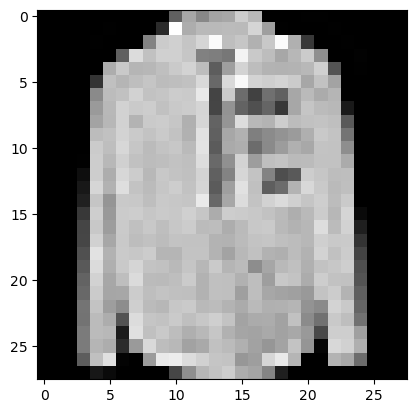

In [55]:
plt.imshow(image.squeeze(), cmap='gray')
image.shape

In [56]:
ModelV2.eval()
with torch.inference_mode():
    ModelV2(image.unsqueeze(0).to(device))

In [57]:
# Loss function and Optimizer 

from helper_functions import accuracy_fn

loss_fnV2 = nn.CrossEntropyLoss()

optimizerV2 = torch.optim.SGD(params=ModelV2.parameters(),
                              lr=0.1)

In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_V2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    train_step(model=ModelV2,
               data_loader=train_dataloader,
               loss_fn=loss_fnV2,
               accuracy_fn=accuracy_fn,
               optimizer=optimizerV2,
               device=device
               )

    test_step(model=ModelV2,
              data_loader=test_dataloader,
              loss_fn=loss_fnV2,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_V2 = timer()

total_train_time_ModelV2 = print_train_time(start=train_time_start_V2, end=train_time_end_V2, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train Loss: 0.59219 | Train Accuracy: 78.56%
Test Loss: 0.39056 | Test Accuracy: 86.05%
Train Loss: 0.35907 | Train Accuracy: 87.03%
Test Loss: 0.36111 | Test Accuracy: 87.04%
Train Loss: 0.32348 | Train Accuracy: 88.20%
Test Loss: 0.31131 | Test Accuracy: 88.90%
Train time on cuda is 33.7815 seconds


In [59]:
ModelV2_results = eval_model(model=ModelV2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fnV2,
                             accuracy_fn=accuracy_fn,
                             device=device)

ModelV2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV2',
 'Model Loss': 0.3113122582435608,
 'Model Accuracy': '88.90%'}

In [60]:
ModelV0_results

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': '83.43%'}

In [61]:
ModelV1_results

{'Model Name': 'FashionMNISTModelV1',
 'Model Loss': 0.6850008964538574,
 'Model Accuracy': '75.02%'}

In [62]:
import pandas as pd
compare_results = pd.DataFrame([ModelV0_results,
                                ModelV1_results,
                                ModelV2_results]) # Passing Dictionary

compare_results

,Model Name,Model Loss,Model Accuracy
0,FashionMNISTModelV0,0.476639,83.43%
1,FashionMNISTModelV1,0.685001,75.02%
2,FashionMNISTModelV2,0.311312,88.90%


In [63]:
compare_train_time = pd.DataFrame([total_train_time_ModelV0, total_train_time_ModelV1, total_train_time_ModelV2])
compare_train_time

,0
0,19.981702
1,29.569326
2,33.781459


In [64]:
compare_results['Total Training Time'] = [total_train_time_ModelV0,
                                          total_train_time_ModelV1,
                                          total_train_time_ModelV2]

compare_results

,Model Name,Model Loss,Model Accuracy,Total Training Time
0,FashionMNISTModelV0,0.476639,83.43%,19.981702
1,FashionMNISTModelV1,0.685001,75.02%,29.569326
2,FashionMNISTModelV2,0.311312,88.90%,33.781459


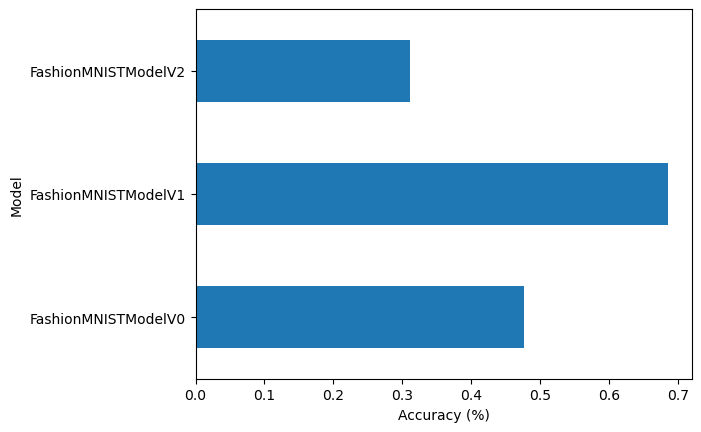

In [65]:
# Visualize Model Results
compare_results.set_index('Model Name')['Model Loss'].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

In [66]:
# Remove % from Model Accuracy Column
# compare_results['Model Accuracy'] = compare_results['Model Accuracy'].str.rstrip('%').astype(float)

In [127]:
# Make and evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) # Adding an batch dim

            # Forward Paass 
            pred_logit = model(sample)

            # Ger prediction probability (logit -> prediction prob)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    # print(f'Just List: {pred_probs[:2]}')
    # Separate Tensors [tensor([--]), tensor([--])]

    # print((f'Torch Stack List: {torch.stack(pred_probs[:2])}') 
    # 1 Single Tensor tensor([[--], [--]])
    
    return torch.stack(pred_probs)

In [74]:
image, label = test_data[0][:10]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [145]:
import random 
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9): # 9 samples

    test_samples.append(sample)
    test_labels.append(label)

# View first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

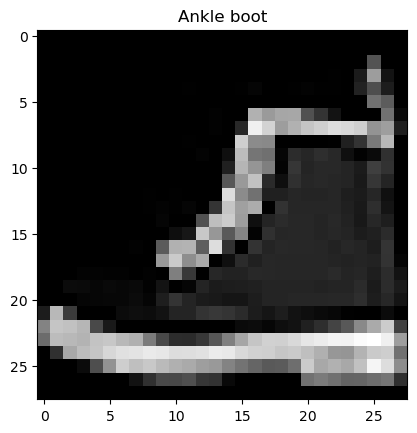

In [141]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]]) # class_names is a list

In [123]:
pred_probs = make_predictions(model=ModelV2,
                              data=test_samples)

pred_probs[:1].argmax(dim=1), class_names[pred_probs[:1].argmax(dim=1).item()]

Just List: [tensor([1.8849e-08, 3.1732e-08, 1.9705e-08, 1.8635e-08, 1.2072e-08, 9.9995e-01,
        5.1956e-08, 6.1403e-06, 1.0083e-05, 3.3503e-05]), tensor([6.6998e-02, 5.5198e-01, 1.4693e-03, 1.2793e-01, 9.6392e-02, 1.4918e-04,
        1.5347e-01, 7.2632e-04, 6.0476e-04, 2.8876e-04])]
Torch Stack List: tensor([[1.8849e-08, 3.1732e-08, 1.9705e-08, 1.8635e-08, 1.2072e-08, 9.9995e-01,
         5.1956e-08, 6.1403e-06, 1.0083e-05, 3.3503e-05],
        [6.6998e-02, 5.5198e-01, 1.4693e-03, 1.2793e-01, 9.6392e-02, 1.4918e-04,
         1.5347e-01, 7.2632e-04, 6.0476e-04, 2.8876e-04]])


(tensor([5]), 'Sandal')

In [125]:
pred_probs2 = make_predictions(model=ModelV2,
                               data=test_samples)

pred_probs2.argmax(dim=1), test_labels

Just List: [tensor([1.8849e-08, 3.1732e-08, 1.9705e-08, 1.8635e-08, 1.2072e-08, 9.9995e-01,
        5.1956e-08, 6.1403e-06, 1.0083e-05, 3.3503e-05]), tensor([6.6998e-02, 5.5198e-01, 1.4693e-03, 1.2793e-01, 9.6392e-02, 1.4918e-04,
        1.5347e-01, 7.2632e-04, 6.0476e-04, 2.8876e-04])]
Torch Stack List: tensor([[1.8849e-08, 3.1732e-08, 1.9705e-08, 1.8635e-08, 1.2072e-08, 9.9995e-01,
         5.1956e-08, 6.1403e-06, 1.0083e-05, 3.3503e-05],
        [6.6998e-02, 5.5198e-01, 1.4693e-03, 1.2793e-01, 9.6392e-02, 1.4918e-04,
         1.5347e-01, 7.2632e-04, 6.0476e-04, 2.8876e-04]])


(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

In [146]:
pred_classes = make_predictions(model=ModelV2,
                                data=test_samples)

pred_classes = pred_classes.argmax(dim=1)

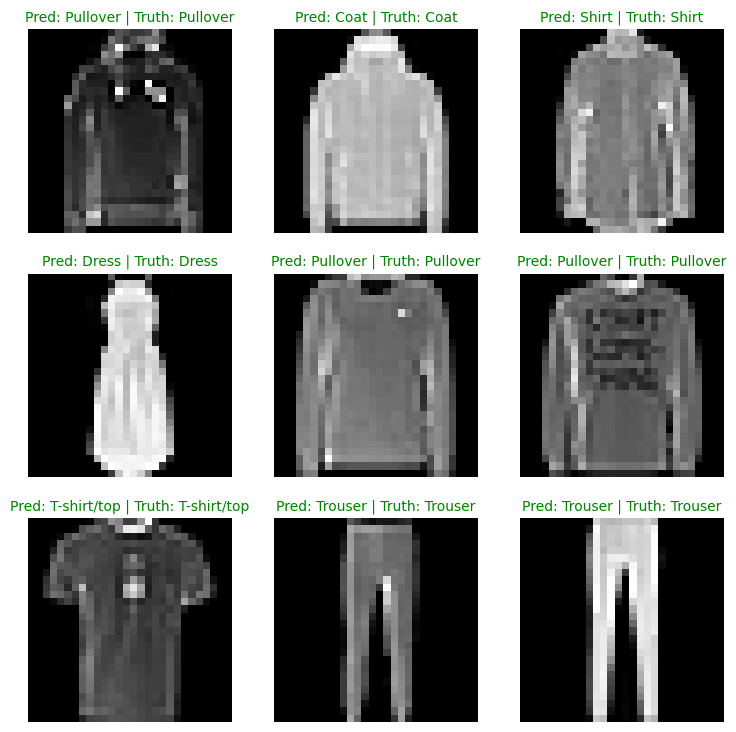

In [147]:
# Plot Predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = class_names[pred_classes[i]]
    
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if truth_label == pred_label:
        plt.title(title_text, c='g', fontsize=10)
    
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis('off')
    

In [179]:
# Confusion Matrix - `torch.metrics.ConfusionMatrix`

from tqdm.auto import tqdm

# Make Predictins

y_preds = []

ModelV2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc=" Making Predictions"):

        X, y = X.to(device), y.to(device)

        y_logits = ModelV2(X)

        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

# print(y_preds) # [tensor([]), tensor([])]
y_pred_tensor = torch.cat(y_preds) # tensor([])
y_pred_tensor, y_preds

 Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1,  ..., 8, 1, 2]),
 [tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
          1, 6, 6, 0, 9, 4, 8, 8]),
  tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 4, 5, 8, 2, 2,
          8, 4, 8, 0, 7, 7, 8, 5]),
  tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 4, 8, 5, 9, 5, 0, 3, 2,
          0, 6, 5, 3, 6, 7, 1, 6]),
  tensor([0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
          0, 0, 9, 9, 3, 0, 8, 4]),
  tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
          1, 4, 5, 6, 4, 7, 9, 3]),
  tensor([5, 2, 3, 8, 0, 9, 4, 8, 4, 2, 6, 5, 6, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 8,
          7, 8, 9, 4, 4, 7, 1, 2]),
  tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 6, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
          1, 6, 7, 2, 8, 5, 6, 0]),
  tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 4, 9, 2, 2, 8, 6, 4,
          3, 2, 9, 7, 3, 5, 5, 4]),
  tensor([8, 5, 2, 3,

In [180]:
import torchmetrics, mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

mlxtend.__version__

'0.23.4'

In [188]:
type(len(class_names))
y_pred_tensor.shape, test_data.targets.shape
y_pred_tensor.dtype, test_data.targets.dtype
y_pred_tensor, test_data.targets

(tensor([9, 2, 1,  ..., 8, 1, 2]), tensor([9, 2, 1,  ..., 8, 1, 5]))

In [ ]:
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')

# This is multi class 

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

confmat_tensor

tensor([[656,   6,  46,  67,  13,   1, 207,   0,   4,   0],
        [  6, 919,   5,  50,  12,   0,   4,   1,   3,   0],
        [  8,   2, 818,  13,  96,   0,  61,   0,   2,   0],
        [ 29,  16,  20, 853,  34,   0,  40,   0,   6,   2],
        [  3,   5, 114,  48, 736,   0,  88,   0,   6,   0],
        [  6,   2,   3,   6,   1, 846,   5,  45,  63,  23],
        [ 67,   6, 126,  59,  89,   0, 639,   0,  14,   0],
        [  2,   2,   0,   0,   0,  26,   0, 904,   9,  57],
        [  9,   3,  16,  13,  15,   6,  25,   6, 906,   1],
        [  0,   1,   0,   3,   0,  24,   2,  72,   8, 890]])

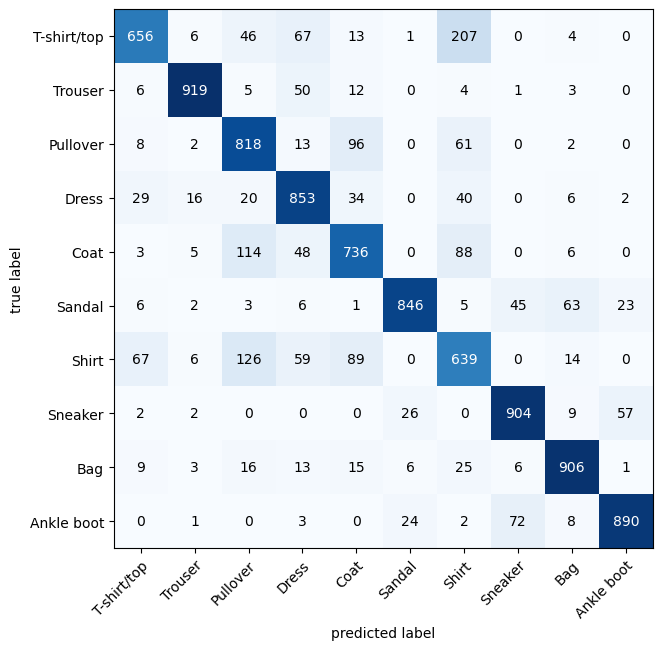

In [193]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib works with numpy
    class_names=class_names,
    figsize=(10,7)
)

In [198]:
# Save and Load
from pathlib import Path
modelpath = Path('Models')
modelpath.mkdir(parents=True, exist_ok=True)

modelname = '03_pytorch_computer_vision_ModelV2.pth'

modelsavepath = modelpath / modelname

print(f'Saving model to: {modelsavepath}')
torch.save(obj=ModelV2.state_dict(),
           f=modelsavepath)

Saving model to: Models\03_pytorch_computer_vision_ModelV2.pth


In [201]:
# Loading the Model
torch.manual_seed(42)
ld_ModelV2 = FashionMNISTModelV2(input_shape=1,
                                 hidden_units=10,
                                 output_shape=len(class_names))

ld_ModelV2.load_state_dict(torch.load(f=modelsavepath))

C:\Users\prash\AppData\Local\Temp\ipykernel_20876\593877427.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ld_ModelV2.load_state_dict(torch.load(f=modelsavepath))


<All keys matched successfully>

In [202]:
ld_ModelV2.to(device)

FashionMNISTModelV2(
  (conv_block_one): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_two): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [203]:
# Evaluate the loaded model
ModelV2_results

{'Model Name': 'FashionMNISTModelV2',
 'Model Loss': 0.3113122582435608,
 'Model Accuracy': '88.90%'}

In [206]:
ld_ModelV2_results = eval_model(model=ld_ModelV2,
                                data_loader=test_dataloader,
                                loss_fn=loss_fnV2,
                                accuracy_fn=accuracy_fn,
                                device=device)
ld_ModelV2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModelV2',
 'Model Loss': 0.3113122582435608,
 'Model Accuracy': '88.90%'}

In [209]:
# Check if model results are close to each other
torch.isclose(torch.tensor(ModelV2_results['Model Loss']),
              torch.tensor(ld_ModelV2_results['Model Loss']),
              atol=1e-02) # Tolerance, within 2 decimal places

tensor(True)